# Electric Vehicle Charging Analysis

## Importing all necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading the CSV file into a pandas DataFrame
Now, we will read the EV charging dataset into a pandas DataFrame so we can analyze the data.


In [3]:
df = pd.read_csv('./ev_charging_patterns.csv')
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


## Check for and handle missing data
We will check for missing values in the dataset, drop any rows with null values, and verify the updated shape of the DataFrame.


In [21]:
# Checking and dropping all nulls
df.isnull().sum()

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

In [22]:
df.dropna(inplace = True)

In [23]:
df.shape

(1131, 20)

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.columns

Index(['User ID', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Station ID', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type'],
      dtype='object')

## Exploring Peak Charging Hours
We'll extract the hour from the charging start and end times to determine the busiest hours for charging.


### Data Preparation for Peak Hours
We will convert the start and end times to a datetime format, extract the hour, and categorize it into defined time bins (e.g., Midnight-4am, 4am-8am, etc.).

In [26]:
# What are the peak charging hours?

df[['Charging Start Time', 'Charging End Time']]

,Charging Start Time,Charging End Time
0,2024-01-01 00:00:00,2024-01-01 00:39:00
1,2024-01-01 01:00:00,2024-01-01 03:01:00
2,2024-01-01 02:00:00,2024-01-01 04:48:00
3,2024-01-01 03:00:00,2024-01-01 06:42:00
4,2024-01-01 04:00:00,2024-01-01 05:46:00
...,...,...
1315,2024-02-24 19:00:00,2024-02-24 20:30:00
1316,2024-02-24 20:00:00,2024-02-24 20:44:00
1317,2024-02-24 21:00:00,2024-02-24 23:03:00
1318,2024-02-24 22:00:00,2024-02-24 23:20:00


In [27]:
# CHecking data type of start time and end time to strip hour from it
df.dtypes

User ID                                      object
Vehicle Model                                object
Battery Capacity (kWh)                      float64
Charging Station ID                          object
Charging Station Location                    object
Charging Start Time                          object
Charging End Time                            object
Energy Consumed (kWh)                       float64
Charging Duration (hours)                   float64
Charging Rate (kW)                          float64
Charging Cost (USD)                         float64
Time of Day                                  object
Day of Week                                  object
State of Charge (Start %)                   float64
State of Charge (End %)                     float64
Distance Driven (since last charge) (km)    float64
Temperature (°C)                            float64
Vehicle Age (years)                         float64
Charger Type                                 object
User Type   

In [28]:
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])
df['Start Hour'] = df['Charging Start Time'].dt.hour

In [29]:
df['Start Hour'].describe()

count    1131.000000
mean       11.573828
std         6.880946
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: Start Hour, dtype: float64

In [30]:
df['Charging End Time'] = pd.to_datetime(df['Charging End Time'])
df['End Hour'] = df['Charging Start Time'].dt.hour

In [31]:
df['End Hour'].describe()

count    1131.000000
mean       11.573828
std         6.880946
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: End Hour, dtype: float64

In [32]:
# Need to group hours within 4 hour time frames

bins = [0, 4, 8, 12, 16, 20, 24]
labels = ['Midnight - 4', '4am-8am', '8am-12pm', '12pm-4pm', '4pm-8pm', '8pm - 12am']

In [33]:
# Sorting start and end hours into our bins

df['Start Hour Range'] = pd.cut(df['Start Hour'], bins=bins, labels=labels, right = False)
df['End Hour Range'] = pd.cut(df['End Hour'], bins=bins, labels=labels, right = False)

In [34]:
# Counting number of values within each bin

start_hour_counts = df['Start Hour Range'].value_counts().sort_index(ascending=False)
end_hour_counts = df['End Hour Range'].value_counts().sort_index()

## Visualizing Peak Charging Hours

### What are the peak charging hours?
The busiest charging hours seem to occur between 4pm and 8pm, which may indicate that drivers prefer to charge after work hours.

In [35]:
# Grouping them and sorting them from highest to lowest

start_hour_counts = df.groupby('Start Hour Range').size()
start_hour_counts = start_hour_counts.sort_values(ascending=False)
start_hour_counts

C:\Users\dorgh\AppData\Local\Temp\ipykernel_23616\3600072847.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  start_hour_counts = df.groupby('Start Hour Range').size()


Start Hour Range
4pm-8pm         194
8am-12pm        190
8pm - 12am      188
Midnight - 4    187
12pm-4pm        187
4am-8am         185
dtype: int64

In [36]:
end_hour_counts = df.groupby('End Hour Range').size()
end_hour_counts = end_hour_counts.sort_values(ascending=False)
end_hour_counts

C:\Users\dorgh\AppData\Local\Temp\ipykernel_23616\1830672162.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  end_hour_counts = df.groupby('End Hour Range').size()


End Hour Range
4pm-8pm         194
8am-12pm        190
8pm - 12am      188
Midnight - 4    187
12pm-4pm        187
4am-8am         185
dtype: int64

Text(0.5, 1.0, 'Charging Sessions by Hour Range')

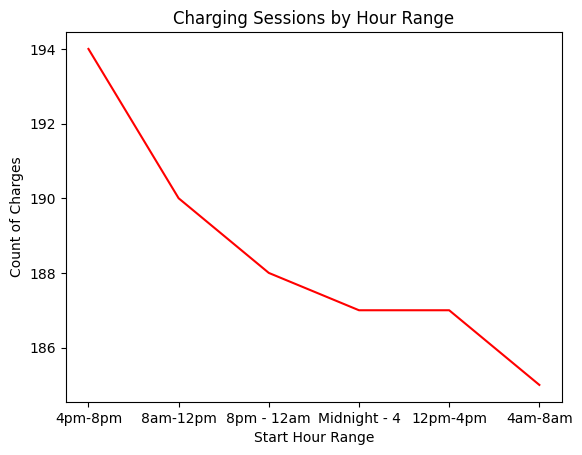

In [37]:
# Since the start and end times are all the same indicating charging is less than an hour, we will graph it with only the start hour
# As we can see from the chart, 4pm - 8pm is the peak charging hours
# There was a time of day column I missed which could have givne me this info 

start_hour_counts.plot(kind = 'line', color = 'red')

plt.xlabel('Start Hour Range')
plt.ylabel('Count of Charges')
plt.title('Charging Sessions by Hour Range')

In [38]:
# Is there a seasonal pattern to charging activity?
# Make 4 charts summer, fall, winter, spring

df['Month'] = df['Charging Start Time'].dt.month

season_bins = [0, 3, 6, 9, 12]
season_labels = ['winter', 'spring', 'summer', 'fall']

df['Season'] = pd.cut(df['Month'], bins=season_bins, labels=season_labels, right = False)


In [39]:
season_counts_grouped = df.groupby('Season').size()
season_counts_grouped = season_counts_grouped.sort_values(ascending = False)
season_counts_grouped

C:\Users\dorgh\AppData\Local\Temp\ipykernel_23616\2495369888.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_counts_grouped = df.groupby('Season').size()


Season
winter    1131
spring       0
summer       0
fall         0
dtype: int64

In [40]:
# Looks like the data only has data for january and february

df['Month'].unique()

array([1, 2], dtype=int32)

In [41]:
# What is the average charging cost per user? 
# The average cost per user is $22.5 (USD)
df['Charging Cost (USD)'].mean()

np.float64(22.488351054748133)

## Analyzing the Relationship Between Charging Duration and Cost
Scatter Plot for Charging Duration vs. Cost

In [42]:
# Is there a relationship between charging duration and cost? 

df[['Charging Duration (hours)', 'Charging Cost (USD)']].head()


,Charging Duration (hours),Charging Cost (USD)
0,0.591363,13.087717
1,3.133652,21.128448
2,2.452653,35.667270
3,1.266431,13.036239
4,2.019765,10.161471


Text(0.5, 1.0, 'Charging Duration vs Charging Cost')

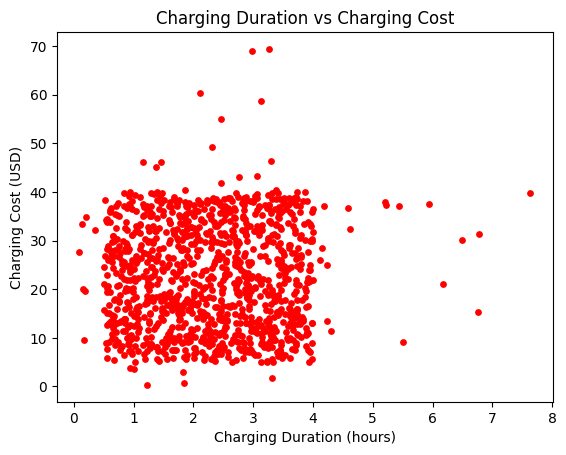

In [43]:
# Not too strong of a correlation or any at all as the scatter plot shows plots in a box ranging from 1 - 4 hours and $10 - $40 with some outliers

plt.scatter(df['Charging Duration (hours)'], df['Charging Cost (USD)'], color = 'red', s=15)

plt.xlabel('Charging Duration (hours)')
plt.ylabel('Charging Cost (USD)')
plt.title('Charging Duration vs Charging Cost')

## Analyzing Charging Rates by Charger Type
We will group the data by charger type and calculate the average charging rate for each type of charger.

In [44]:
# How does the charging rate vary between different charger types?

df[['Charger Type', 'Charging Rate (kW)']]

,Charger Type,Charging Rate (kW)
0,DC Fast Charger,36.389181
1,Level 1,30.677735
2,Level 2,27.513593
3,Level 1,32.882870
4,Level 1,10.215712
...,...,...
1315,DC Fast Charger,5.895475
1316,Level 2,18.388012
1317,DC Fast Charger,45.482066
1318,Level 2,38.148183


In [45]:
# Grouping by the charger type and taking the mean of the charging rate

charger_type_rate = df.groupby('Charger Type')['Charging Rate (kW)'].mean().reset_index()
charger_type_rate

,Charger Type,Charging Rate (kW)
0,DC Fast Charger,25.609321
1,Level 1,26.033100
2,Level 2,26.402854


In [46]:
# Sorting from highest to lowest charging rate
charger_type_rate_sorted = charger_type_rate.sort_values(by='Charging Rate (kW)', ascending=False)
charger_type_rate_sorted


,Charger Type,Charging Rate (kW)
2,Level 2,26.402854
1,Level 1,26.033100
0,DC Fast Charger,25.609321


### Plotting the Average Charging Rate by Charger Type
We will visualize the average charging rate by charger type using a bar chart to better understand how the charging rates vary across different charger types.

### Answer:
The average charging rate barely varies between charger types, with Level 2 being the fastest and DC Fast Charger the slowest, which is unexpected as DC Fast Chargers are typically faster.


Text(0.5, 1.0, 'Average Charging Rate by Charger Type')

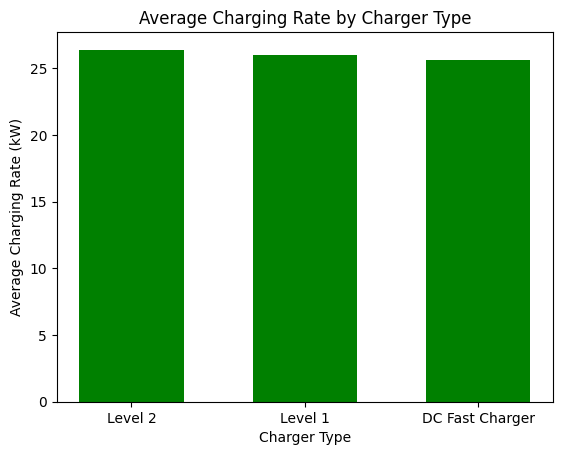

In [47]:
# The charging rate barely varies between charger types, making level 2 the fastest and DC Fast CHarger the slowest which is counterintuitive because it should be the oppisite

plt.bar(charger_type_rate_sorted['Charger Type'], charger_type_rate_sorted['Charging Rate (kW)'], color = 'green', width = 0.6)

plt.xlabel('Charger Type')
plt.ylabel('Average Charging Rate (kW)')
plt.title('Average Charging Rate by Charger Type')

## Step 7: Analyzing the State of Charge (SOC) Change
Now we will examine how much the state of charge changes from the start to the end of a charging session. This will help us understand how much energy users typically add during a charging session.

In [48]:
#How does the state of charge at the start and end of charging vary?

df[['State of Charge (Start %)', 'State of Charge (End %)']].head()

,State of Charge (Start %),State of Charge (End %)
0,29.371576,86.119962
1,10.115778,84.664344
2,6.854604,69.917615
3,83.120003,99.624328
4,54.258950,63.743786


### Calculating and Plotting the SoC Change Distribution
We will calculate the difference between the start and end SoC for each session, and visualize it using a histogram.

In [49]:
df['SOC Change (%)'] = df['State of Charge (End %)'] - df['State of Charge (Start %)']
df[['SOC Change (%)']]

,SOC Change (%)
0,56.748386
1,74.548566
2,63.063011
3,16.504325
4,9.484836
...,...
1315,44.711850
1316,61.640087
1317,6.775798
1318,-10.261424


Text(0, 0.5, 'Number of Charging Sessions')

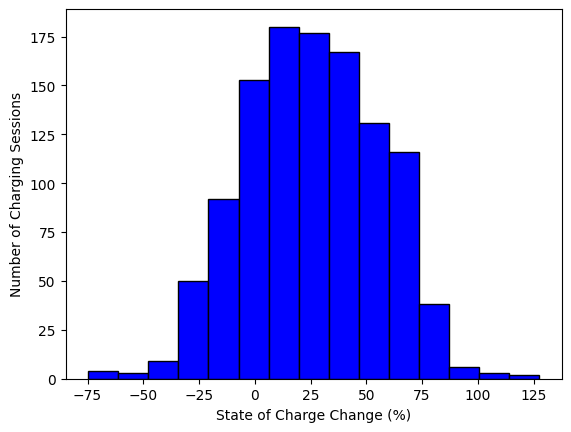

In [50]:
# The histogram shows that >50% of drivers let their cars charge for approx. 50% before leaving
# The peak at 175 sessions is at approx 15-20% SOC change
# WIll filter out negative states of changes as that does not apply to this question

plt.hist(df['SOC Change (%)'], bins=15, color='blue', edgecolor='black')
plt.xlabel('State of Charge Change (%)')
plt.ylabel('Number of Charging Sessions')

### Filtering Out Negative SoC Changes

Text(0, 0.5, 'Number of Charging Sessions')

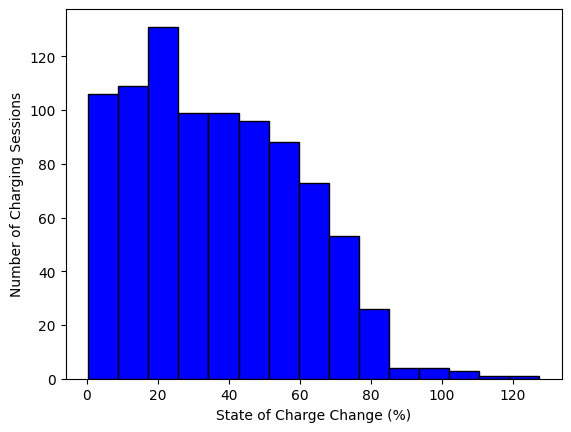

In [51]:
df_positive_change = df[df['SOC Change (%)'] >= 0]

plt.hist(df_positive_change['SOC Change (%)'], bins=15, color='blue', edgecolor='black')
plt.xlabel('State of Charge Change (%)')
plt.ylabel('Number of Charging Sessions')

In [52]:
# What type of drivers have the highest state of change/lowest state of change
df[['User Type', 'SOC Change (%)']]

,User Type,SOC Change (%)
0,Commuter,56.748386
1,Casual Driver,74.548566
2,Commuter,63.063011
3,Long-Distance Traveler,16.504325
4,Long-Distance Traveler,9.484836
...,...,...
1315,Commuter,44.711850
1316,Casual Driver,61.640087
1317,Commuter,6.775798
1318,Commuter,-10.261424


## Step 8: Analyzing Driver Type and SOC Change
We will now analyze the relationship between driver types and their SOC changes during charging. This will help us understand whether different types of users (e.g., casual drivers, long-distance travelers) have different charging habits.

In [53]:
# Grouping the drivers and getting the mean of State OF Change per group

driver_state_change = df.groupby(by = 'User Type')['SOC Change (%)'].mean().reset_index()
driver_state_change

,User Type,SOC Change (%)
0,Casual Driver,28.633663
1,Commuter,25.534076
2,Long-Distance Traveler,23.457807


In [54]:
# Sorting from the highest state of change to the lowest

driver_state_change_sorted = driver_state_change.sort_values(by='SOC Change (%)', ascending=False)
driver_state_change_sorted

,User Type,SOC Change (%)
0,Casual Driver,28.633663
1,Commuter,25.534076
2,Long-Distance Traveler,23.457807


### Sub-step 8.2: Visualizing SoC Change by Driver Type
We will visualize the average SoC change for each driver type using a line graph to better understand how charging behavior varies among different user groups.

### Answer:
From the line graph, we can see that casual drivers have the highest average SOC change (approximately 29%), while long distance travelers have the lowest SOC change (around 23.5%). This indicates that casual drivers may be more patient or have fewer constraints, while long distance travelers likely prioritize quick charging.

([0, 1, 2],
 [Text(0, 0, 'Casual Driver'),
  Text(1, 0, 'Commuter'),
  Text(2, 0, 'Long-Distance Traveler')])

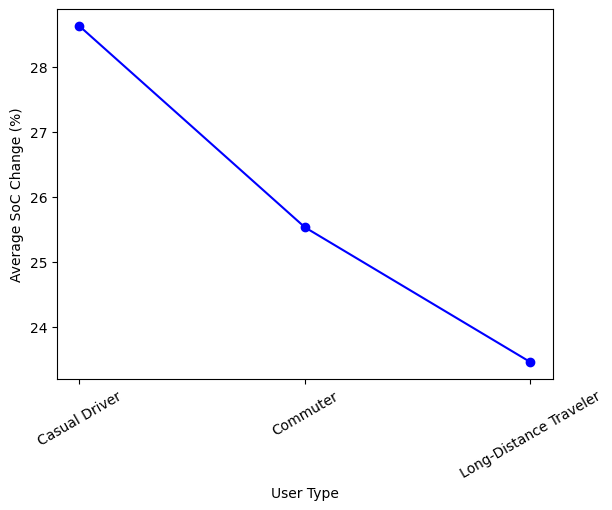

In [55]:
# The line graph shows that casual drivers have the highest average state of change at approx. 29% & long distance with the lowest at approx. 23.5%
# Long distance travelers are less patient than the casuals

plt.plot(driver_state_change_sorted['User Type'], driver_state_change_sorted['SOC Change (%)'], marker = 'o', linestyle = '-', color = 'blue')

plt.xlabel('User Type')
plt.ylabel('Average SoC Change (%)')
plt.xticks(rotation=30)